# Forecasting Assignment

## Dataset - Plasticsales

## Objective:-We want predict plastic sales

#### Importing Important Libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from pandas.plotting import lag_plot
import warnings
warnings.filterwarnings("ignore")
import statsmodels.formula.api as smf

#### Load the dateset and understand it

In [3]:
data=pd.read_csv("PlasticSales.csv")

In [4]:
data.head()

,Month,Sales
0,Jan-49,742
1,Feb-49,697
2,Mar-49,776
3,Apr-49,898
4,May-49,1030


In [5]:
#checking the null value and data type of attribute
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   60 non-null     object
 1   Sales   60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [6]:
data.isnull().sum()

Month    0
Sales    0
dtype: int64

In [7]:
data.shape

(60, 2)

<AxesSubplot:>

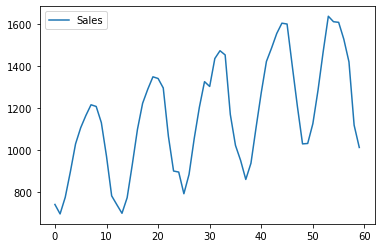

In [8]:
#Visualize the data
data.plot()

In [9]:
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [10]:
data["Date"]=pd.to_datetime(data.Month,format="%b-%y")
data["month"] = data.Date.dt.strftime("%b") 
data["year"] = data.Date.dt.strftime("%Y")
data.head()

,Month,Sales,Date,month,year
0,Jan-49,742,2049-01-01,Jan,2049
1,Feb-49,697,2049-02-01,Feb,2049
2,Mar-49,776,2049-03-01,Mar,2049
3,Apr-49,898,2049-04-01,Apr,2049
4,May-49,1030,2049-05-01,May,2049


<AxesSubplot:xlabel='month', ylabel='year'>

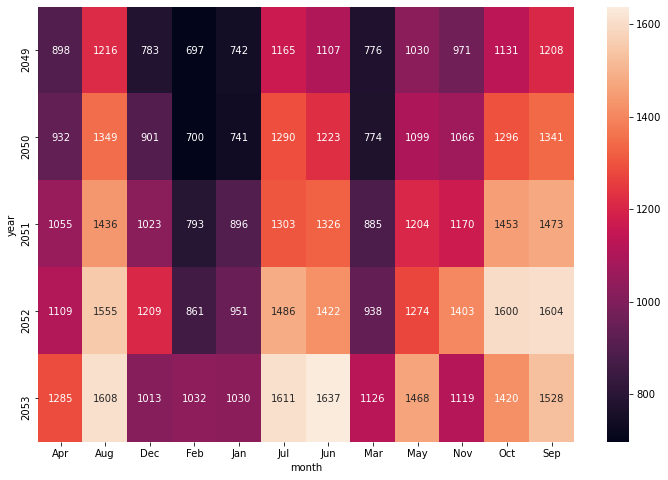

In [11]:
plt.figure(figsize=(12,8))
plot = pd.pivot_table(data=data,values="Sales",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(plot,annot=True,fmt="g")


<AxesSubplot:xlabel='month', ylabel='Sales'>

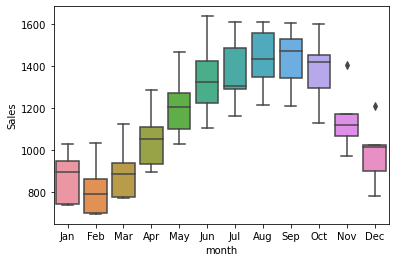

In [12]:
sns.boxplot(x="month",y="Sales",data=data)

<AxesSubplot:xlabel='year', ylabel='Sales'>

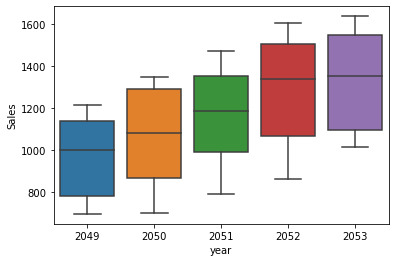

In [13]:
sns.boxplot(x="year",y="Sales",data=data)

In [14]:
import numpy as np
p = data["Month"][0]
p[0:3]
data['months']= 0


In [15]:
for i in range(60):
    p = data["Month"][i]
    data['months'][i]= p[0:3]
data.head()    

,Month,Sales,Date,month,year,months
0,Jan-49,742,2049-01-01,Jan,2049,Jan
1,Feb-49,697,2049-02-01,Feb,2049,Feb
2,Mar-49,776,2049-03-01,Mar,2049,Mar
3,Apr-49,898,2049-04-01,Apr,2049,Apr
4,May-49,1030,2049-05-01,May,2049,May


In [16]:
month_dummies = pd.DataFrame(pd.get_dummies(data['months']))
data= pd.concat([data,month_dummies],axis = 1)
data.head()

,Month,Sales,Date,month,year,months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,Jan-49,742,2049-01-01,Jan,2049,Jan,0,0,0,0,1,0,0,0,0,0,0,0
1,Feb-49,697,2049-02-01,Feb,2049,Feb,0,0,0,1,0,0,0,0,0,0,0,0
2,Mar-49,776,2049-03-01,Mar,2049,Mar,0,0,0,0,0,0,0,1,0,0,0,0
3,Apr-49,898,2049-04-01,Apr,2049,Apr,1,0,0,0,0,0,0,0,0,0,0,0
4,May-49,1030,2049-05-01,May,2049,May,0,0,0,0,0,0,0,0,1,0,0,0


In [17]:
data['t']=range(1,61)
data['t_square']=data['t']*data['t']
data.head()

,Month,Sales,Date,month,year,months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square
0,Jan-49,742,2049-01-01,Jan,2049,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1,1
1,Feb-49,697,2049-02-01,Feb,2049,Feb,0,0,0,1,0,0,0,0,0,0,0,0,2,4
2,Mar-49,776,2049-03-01,Mar,2049,Mar,0,0,0,0,0,0,0,1,0,0,0,0,3,9
3,Apr-49,898,2049-04-01,Apr,2049,Apr,1,0,0,0,0,0,0,0,0,0,0,0,4,16
4,May-49,1030,2049-05-01,May,2049,May,0,0,0,0,0,0,0,0,1,0,0,0,5,25


In [18]:
data['log_Sales']=np.log(data['Sales'])
data.head()

,Month,Sales,Date,month,year,months,Apr,Aug,Dec,Feb,...,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Sales
0,Jan-49,742,2049-01-01,Jan,2049,Jan,0,0,0,0,...,0,0,0,0,0,0,0,1,1,6.609349
1,Feb-49,697,2049-02-01,Feb,2049,Feb,0,0,0,1,...,0,0,0,0,0,0,0,2,4,6.546785
2,Mar-49,776,2049-03-01,Mar,2049,Mar,0,0,0,0,...,0,0,1,0,0,0,0,3,9,6.654153
3,Apr-49,898,2049-04-01,Apr,2049,Apr,1,0,0,0,...,0,0,0,0,0,0,0,4,16,6.800170
4,May-49,1030,2049-05-01,May,2049,May,0,0,0,0,...,0,0,0,1,0,0,0,5,25,6.937314


<AxesSubplot:xlabel='year', ylabel='Sales'>

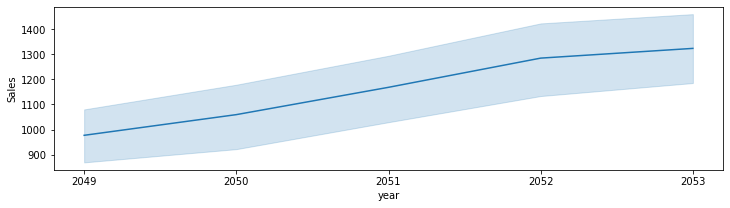

In [19]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Sales",data=data)

In [20]:
Train=data.head(50)
Test=data.tail(10)

<AxesSubplot:>

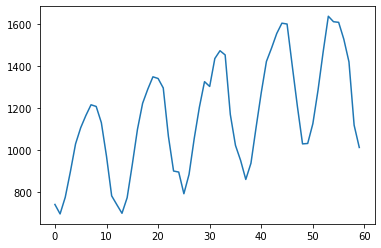

In [21]:
data.Sales.plot()

# developing the model of linear

In [22]:
linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  linear_model.predict(pd.DataFrame(Test['t']))
pred_linear

50    1346.386939
51    1355.322113
52    1364.257287
53    1373.192461
54    1382.127635
55    1391.062809
56    1399.997983
57    1408.933157
58    1417.868331
59    1426.803505
dtype: float64

In [23]:
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

225.91579993224306

# developing the model of exponential

In [24]:
Exp = smf.ols('log_Sales~t',data=Train).fit()
pred_Exp = Exp.predict(pd.DataFrame(Test['t']))
pred_Exp

50    7.202450
51    7.210631
52    7.218812
53    7.226994
54    7.235175
55    7.243356
56    7.251537
57    7.259718
58    7.267899
59    7.276080
dtype: float64

In [25]:
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2)) 
rmse_Exp

228.88308625341796

# developing the model of quadratic

In [26]:
Quad = smf.ols('Sales~t+t_square',data=Train).fit()
pred_Quad = Quad.predict(Test[["t","t_square"]])
pred_Quad

50    1313.192551
51    1318.222503
52    1323.102254
53    1327.831804
54    1332.411154
55    1336.840302
56    1341.119250
57    1345.247997
58    1349.226543
59    1353.054888
dtype: float64

In [27]:
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

226.49907446751172

# developing the model of additive seasonality

In [28]:
add_sea = smf.ols('Sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])
pred_add_sea

50     843.25
51     998.50
52    1151.75
53    1269.50
54    1311.00
55    1389.00
56    1406.50
57    1370.00
58    1152.50
59     979.00
dtype: float64

In [29]:
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

235.49981422497916

# developing the model of additive seasonality quadratic

In [30]:
add_sea_Quad = smf.ols('Sales~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']])
pred_add_sea_quad

50    1150.092536
51    1312.359636
52    1472.626736
53    1597.393836
54    1645.910936
55    1730.928035
56    1755.445135
57    1725.962235
58    1515.479335
59    1348.996435
dtype: float64

In [37]:
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

208.49047398826872

# developing the model of the multiplicative seasonality

In [31]:
Mul_sea = smf.ols('log_Sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = Mul_sea.predict(Test)
pred_Mult_sea

50    6.733765
51    6.902503
52    7.045698
53    7.142053
54    7.174785
55    7.232322
56    7.243301
57    7.214260
58    7.040281
59    6.873670
dtype: float64

In [32]:
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

239.582188906628

# Developing the model of the multiplicative additive seasonality

In [33]:
Mul_Add_sea = smf.ols('log_Sales~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = Mul_Add_sea.predict(Test)
pred_Mult_add_sea

50    6.967394
51    7.136132
52    7.279326
53    7.375682
54    7.408414
55    7.465950
56    7.476929
57    7.447888
58    7.273909
59    7.107299
dtype: float64

In [34]:
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

178.9755150150626

# comparing the above rmse values of the each value

In [38]:
data1 = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data1)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,178.975515
4,rmse_add_sea_quad,208.490474
0,rmse_linear,225.915800
2,rmse_Quad,226.499074
1,rmse_Exp,228.883086
3,rmse_add_sea,235.499814
5,rmse_Mult_sea,239.582189


# Conclusion - Here we will chose the multiplicative additive seasonality model 